## week3授業課題　信用情報の分析

## 1.このテキストについて
テキストの目的  
・実データに近いものの分析を行う  
・データセットに対して自ら課題を設定できるようにする  

どのように学ぶか
・Kaggleのデータセットを通じて、データ分析の流れやライブラリの使い方を学びます。

## 2.信用情報
Kaggleの Home Credit Default Risk コンペティションを活用し、  
実データに近いものに対し、自ら課題を設定して分析する練習を行います。  
Home Credit Default Risk:   
https://www.kaggle.com/c/home-credit-default-risk  

Week4では機械学習手法を用いて学習・推定を行います。その準備としてWeek3でデータ探索（EDA）を行います。

### 【問題1】コンペティション内容の把握
コンペティションのOverviewページ読み、
「Home Credit Default Risk」はどのようなコンペティションか、以下の観点からレポートしてください。  

・Home Creditはどのような企業？  
・このコンペティションでは何を予測する？  
・それを予測することで企業が得られるメリットは何？  

・ホームクレジット社とは、、  
ホームクレジットは1997年にチェコ共和国で設立されたノンバンクの金融機関です。  

同社は14カ国（米国、ロシア、カザスタン、ベラルーシ、中国、インドを含む）で事業を展開しており、  
主に融資を受けられなかったり、信用できない貸金業者の被害者となってしまった、信用履歴がほとんどない人たちへの融資に力を入れています。

Home Credit グループは、2900万人以上の顧客、210億ユーロの総資産、1億6,000万以上のローン、  
アジアでの大部分と中国でのほぼ半分の顧客を持っています（2018年5月19日現在）。

同社は、顧客の返済能力を予測するために、様々な代替データを使用しています - 電話会社や取引情報を含む - 。
彼らは自社のデータをKaggleコミュニティに公開し、データの可能性を最大限に引き出すためにKagglersに挑戦している。

・このコンペでは、  
お金の融資を受けられない人々に対して、返済能力の有無を予測する。  

・予測することで、  
企業は融資を受けられず困っている人にお金を融資するか判断することが出来て、融資対象者を拡大することができる。

データセットの準備  
データセットはコンペティションのDataページからapplication_train.csvをダウンロードして使用します。  
  
Dataページ内の他のcsvファイルはこの課題では扱いません。

Notebooksについて  
コンペティションのNotebooksページで公開されているものを活用してください。  

《推奨参考Notebooks》  

Home Credit Default Risk Extensive EDA | Kaggle  
https://www.kaggle.com/gpreda/home-credit-default-risk-extensive-eda  
  
HomeCreditRisk: Extensive EDA + Baseline [0.772] | Kaggle  
https://www.kaggle.com/shivamb/homecreditrisk-extensive-eda-baseline-0-772  
  
HomeCreditRisk : Extensive EDA + Baseline Model JP | Kaggle  
https://www.kaggle.com/osciiart/homecreditrisk-extensive-eda-baseline-model-jp

この他タイトルにEDAと付いているものを参考にしてください。

### 【問題2】データの概観の把握
データの概観を把握するために以下のようなことを行ってください。  
  
・.head()、.info()、describe()などを使う  
・欠損値の有無を見る  
・クラスの割合がわかるグラフを描く  
  
それぞれ結果に対する説明や考察も行ってください。

In [152]:
import numpy as np
import pandas as pd
import pandas_profiling as pdp
import matplotlib.pyplot as plt
import seaborn as sns

In [153]:
train = pd.read_csv('./home_credit_default_risk/application_train.csv')
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.00000,406597.50000,24700.50000,...,0,0,0,0,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000
1,100003,0,Cash loans,F,N,N,0,270000.00000,1293502.50000,35698.50000,...,0,0,0,0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
2,100004,0,Revolving loans,M,Y,Y,0,67500.00000,135000.00000,6750.00000,...,0,0,0,0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
3,100006,0,Cash loans,F,N,Y,0,135000.00000,312682.50000,29686.50000,...,0,0,0,0,nan,nan,nan,nan,nan,nan
4,100007,0,Cash loans,M,N,Y,0,121500.00000,513000.00000,21865.50000,...,0,0,0,0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


122列変数がある。うち一つはIDのため、予測には使わなそう。

In [154]:
train.columns.values

array(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3',

各列のラベル名を確認した。

In [155]:
train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307499.00000,307233.00000,307511.00000,307511.00000,307511.00000,...,307511.00000,307511.00000,307511.00000,307511.00000,265992.00000,265992.00000,265992.00000,265992.00000,265992.00000,265992.00000
mean,278180.51858,0.08073,0.41705,168797.91930,599025.99971,27108.57391,538396.20743,0.02087,-16036.99507,63815.04590,...,0.00813,0.00060,0.00051,0.00033,0.00640,0.00700,0.03436,0.26740,0.26547,1.89997
std,102790.17535,0.27242,0.72212,237123.14628,402490.77700,14493.73732,369446.46054,0.01383,4363.98863,141275.76652,...,0.08980,0.02439,0.02252,0.01830,0.08385,0.11076,0.20468,0.91600,0.79406,1.86929
min,100002.00000,0.00000,0.00000,25650.00000,45000.00000,1615.50000,40500.00000,0.00029,-25229.00000,-17912.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,189145.50000,0.00000,0.00000,112500.00000,270000.00000,16524.00000,238500.00000,0.01001,-19682.00000,-2760.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
50%,278202.00000,0.00000,0.00000,147150.00000,513531.00000,24903.00000,450000.00000,0.01885,-15750.00000,-1213.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000
75%,367142.50000,0.00000,1.00000,202500.00000,808650.00000,34596.00000,679500.00000,0.02866,-12413.00000,-289.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,3.00000
max,456255.00000,1.00000,19.00000,117000000.00000,4050000.00000,258025.50000,4050000.00000,0.07251,-7489.00000,365243.00000,...,1.00000,1.00000,1.00000,1.00000,4.00000,9.00000,8.00000,27.00000,261.00000,25.00000


In [156]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [157]:
train.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [158]:
print(train.shape)

(307511, 122)


In [159]:
pd.options.display.float_format = '{:.1f}%'.format

missing_d = train.isnull().sum()[train.isnull().sum()>0].sort_values(ascending=False)

missing_df = pd.DataFrame({'欠損数':missing_d,
                             '欠損率':missing_d/len(train)*100
                            })

display(missing_df.head(30))

,欠損数,欠損率
COMMONAREA_MEDI,214865,69.9%
COMMONAREA_AVG,214865,69.9%
COMMONAREA_MODE,214865,69.9%
NONLIVINGAPARTMENTS_AVG,213514,69.4%
NONLIVINGAPARTMENTS_MODE,213514,69.4%
NONLIVINGAPARTMENTS_MEDI,213514,69.4%
FONDKAPREMONT_MODE,210295,68.4%
LIVINGAPARTMENTS_AVG,210199,68.4%
LIVINGAPARTMENTS_MEDI,210199,68.4%
LIVINGAPARTMENTS_MODE,210199,68.4%


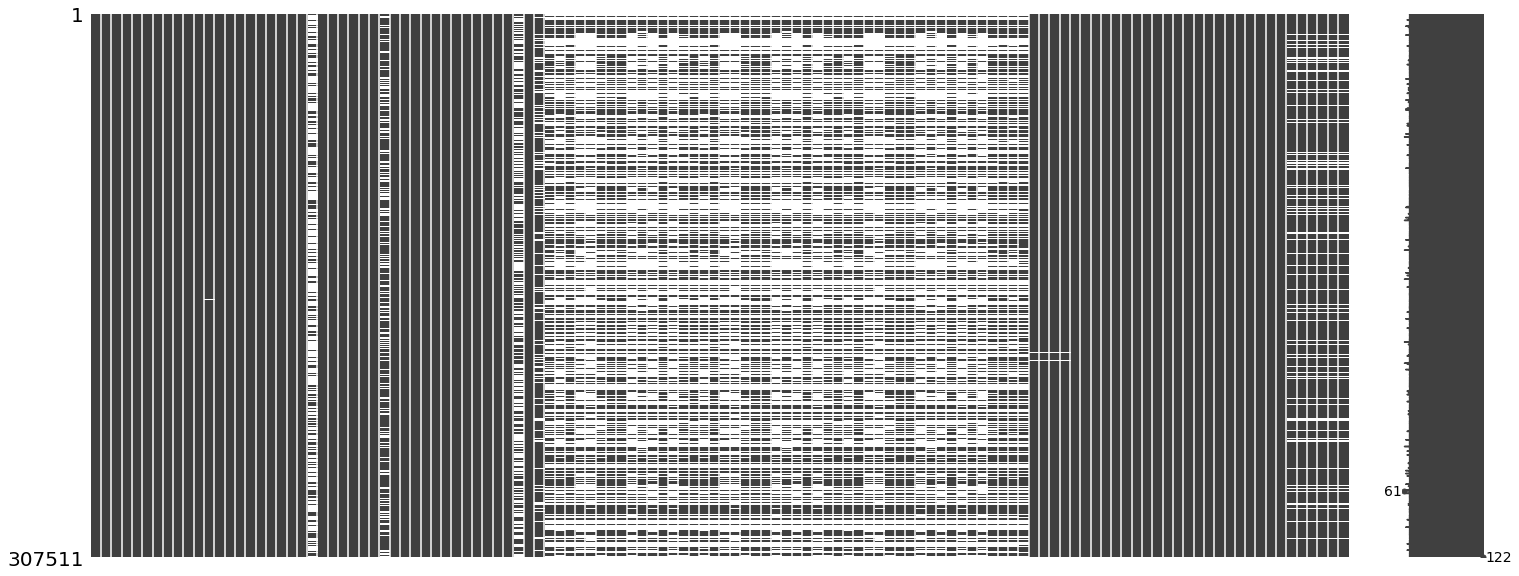

In [160]:
import missingno as msn

msn.matrix(train)
plt.show()

非常に多くの欠損値がありそう。

ここからは、クラスの割合を確認していく。

In [161]:
train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

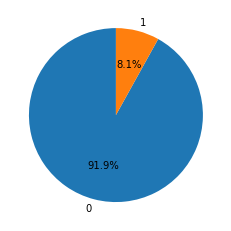

In [162]:
feature = 'TARGET'
label_name = [0,1]

plt.pie(train[feature].value_counts(),
        autopct="%1.1f%%",
        labels = label_name,
        startangle=90)

plt.show()

・問題なく返済：0と、返済が難しい：1  
　9割は、滞りなく返済されており、1割が返済が難しい。

In [163]:
train['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

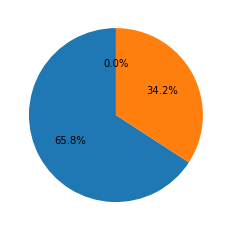

In [164]:
feature = 'CODE_GENDER'

plt.pie(train[feature].value_counts(),
        autopct="%1.1f%%",
        startangle=90)

plt.show()

顧客には、女性が多く65%,男性が34.2%

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

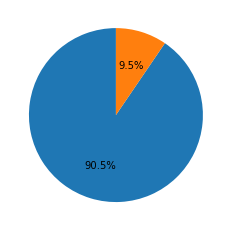

In [165]:
feature = 'NAME_CONTRACT_TYPE'

display(train[feature].value_counts())

plt.pie(train[feature].value_counts(),
        autopct="%1.1f%%",
        startangle=90)

plt.show()

ローン契約は、90%がキャッシュ、10%がリボルビング

### 【問題3】課題設定
データの概観を見たことを元に、自分なりの課題・疑問を複数設定してください。

### 【問題4】データ探索
問題3で設定した課題・疑問を解決するためにデータ探索を進めます。  
探索で使用する表やグラフを、考察と共に 15個以上 作成してください。  
  
探索過程で新しい疑問点が生まれた場合は、問題3の回答に加えていってください。  

これ以降、問題３、問題４の作業をまとめて行います。

①TARGETラベルと各変数の相関係数は？

In [166]:
pd.options.display.float_format = '{:.5f}'.format

corr_target = train.corr()['TARGET'].sort_values()

print('Most Positive Correlations:\n', corr_target.tail(15))
print('\nMost Negative Correlations:\n', corr_target.head(15))

Most Positive Correlations:
 DEF_60_CNT_SOCIAL_CIRCLE      0.03128
DEF_30_CNT_SOCIAL_CIRCLE      0.03225
LIVE_CITY_NOT_WORK_CITY       0.03252
OWN_CAR_AGE                   0.03761
DAYS_REGISTRATION             0.04197
FLAG_DOCUMENT_3               0.04435
REG_CITY_NOT_LIVE_CITY        0.04440
FLAG_EMP_PHONE                0.04598
REG_CITY_NOT_WORK_CITY        0.05099
DAYS_ID_PUBLISH               0.05146
DAYS_LAST_PHONE_CHANGE        0.05522
REGION_RATING_CLIENT          0.05890
REGION_RATING_CLIENT_W_CITY   0.06089
DAYS_BIRTH                    0.07824
TARGET                        1.00000
Name: TARGET, dtype: float64

Most Negative Correlations:
 EXT_SOURCE_3                 -0.17892
EXT_SOURCE_2                 -0.16047
EXT_SOURCE_1                 -0.15532
DAYS_EMPLOYED                -0.04493
FLOORSMAX_AVG                -0.04400
FLOORSMAX_MEDI               -0.04377
FLOORSMAX_MODE               -0.04323
AMT_GOODS_PRICE              -0.03965
REGION_POPULATION_RELATIVE   -0.03723


正、負それぞれの相関係数を大きい順に15個ずつ表示。  
これらの関係をグラフでも確認してみる。  
・DAYS_BIRTHは正の相関関係がありそう。  
・EXT_SOURCE_1,2,3は負の相関関係がありそう。

②TARGETとDAYS_BIRTHにどんな関係が見られるか？

In [167]:
train['DAYS_BIRTH']

0         -9461
1        -16765
2        -19046
3        -19005
4        -19932
          ...  
307506    -9327
307507   -20775
307508   -14966
307509   -11961
307510   -16856
Name: DAYS_BIRTH, Length: 307511, dtype: int64

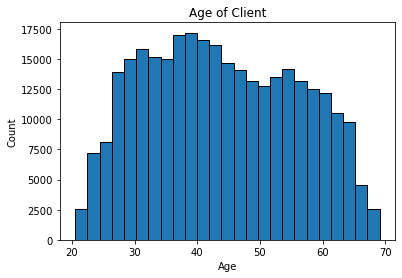

In [168]:
plt.hist(train['DAYS_BIRTH'] / -365, edgecolor = 'k', bins = 25)
plt.title('Age of Client')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

顧客の年齢分布。30〜40代がメインターゲットか？

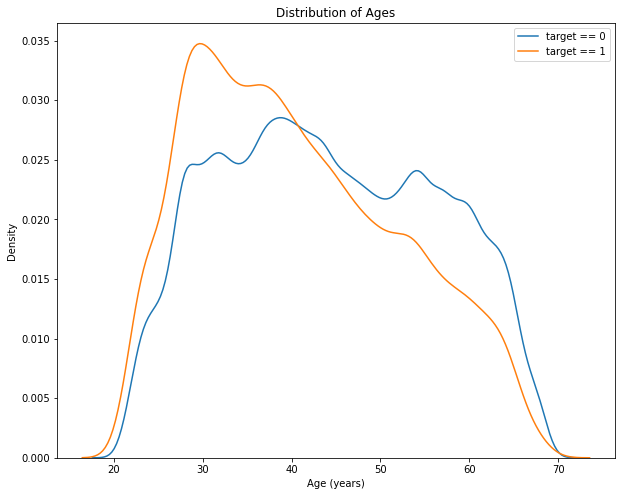

In [169]:
plt.figure(figsize = (10, 8))

sns.kdeplot(train.loc[train['TARGET'] == 0, 'DAYS_BIRTH'] / -365, label = 'target == 0')
sns.kdeplot(train.loc[train['TARGET'] == 1, 'DAYS_BIRTH'] / -365, label = 'target == 1')

plt.xlabel('Age (years)')
plt.ylabel('Density')
plt.title('Distribution of Ages')
plt.legend()
plt.show()

ローン返済が困難なグループは、20〜30の間でピークがあり若い方が難しいと予想される。

③各年齢で、TARGETの値に違いがないか？

In [170]:
train['DAYS_BIRTH'] = abs(train['DAYS_BIRTH'])

age_data = train[['TARGET','DAYS_BIRTH']]
age_data['YEARS_BUIRTH'] = age_data['DAYS_BIRTH']/365

age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BUIRTH'],bins = np.linspace(20,70,11))

age_data

<ipython-input-170-e513fc85fba1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data['YEARS_BUIRTH'] = age_data['DAYS_BIRTH']/365
<ipython-input-170-e513fc85fba1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BUIRTH'],bins = np.linspace(20,70,11))


,TARGET,DAYS_BIRTH,YEARS_BUIRTH,YEARS_BINNED
0,1,9461,25.92055,"(25.0, 30.0]"
1,0,16765,45.93151,"(45.0, 50.0]"
2,0,19046,52.18082,"(50.0, 55.0]"
3,0,19005,52.06849,"(50.0, 55.0]"
4,0,19932,54.60822,"(50.0, 55.0]"
...,...,...,...,...
307506,0,9327,25.55342,"(25.0, 30.0]"
307507,0,20775,56.91781,"(55.0, 60.0]"
307508,0,14966,41.00274,"(40.0, 45.0]"
307509,1,11961,32.76986,"(30.0, 35.0]"


In [171]:
age_groups = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BUIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.12304,8532.79562,23.37752
"(25.0, 30.0]",0.11144,10155.21925,27.82252
"(30.0, 35.0]",0.10281,11854.84838,32.47904
"(35.0, 40.0]",0.08941,13707.90825,37.55591
"(40.0, 45.0]",0.07849,15497.66123,42.45935
"(45.0, 50.0]",0.07417,17323.90044,47.46274
"(50.0, 55.0]",0.06697,19196.49479,52.59314
"(55.0, 60.0]",0.05531,20984.26274,57.49113
"(60.0, 65.0]",0.05274,22780.54746,62.41246


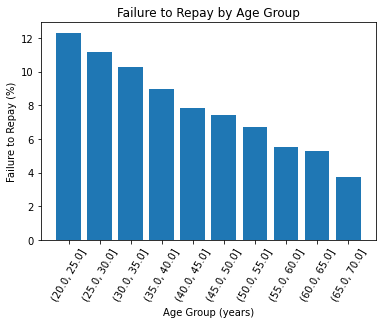

In [172]:
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])
plt.xticks(rotation = 60)
plt.xlabel('Age Group (years)')
plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');

年齢ごとに返済の可否（0or1）を平均してみると、  
返済失敗の割合が、年齢が若ければ若いほど高くなっていることが確認できる。

④負の相関が高かったEXT_SOURCEについて、目的変数との関係性は？

ドキュメントによると、外部の信用格付けスコアのような値

In [173]:
ext_data = train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.00000,-0.15532,-0.16047,-0.17892,-0.07824
EXT_SOURCE_1,-0.15532,1.00000,0.21398,0.18685,0.60061
EXT_SOURCE_2,-0.16047,0.21398,1.00000,0.10917,0.09200
EXT_SOURCE_3,-0.17892,0.18685,0.10917,1.00000,0.20548
DAYS_BIRTH,-0.07824,0.60061,0.09200,0.20548,1.00000


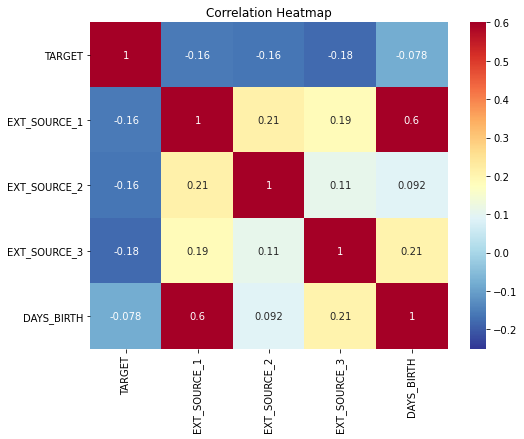

In [174]:
plt.figure(figsize = (8, 6))

# Heatmap of correlations
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

DAYS_BIRTHとEXT_SOURCE_1は正の相関が高そうで、  
EXT_SOURCE_1の信用スコアに、年齢が影響している可能性が高い。と言えそう。  
TARGETとは、それぞれ負の相関になっており、EXT_SOURCEの値が高ければ、返済できる可能性が高い

⑤EXT_SOURCEとTARGETの分布はどうなっているか？

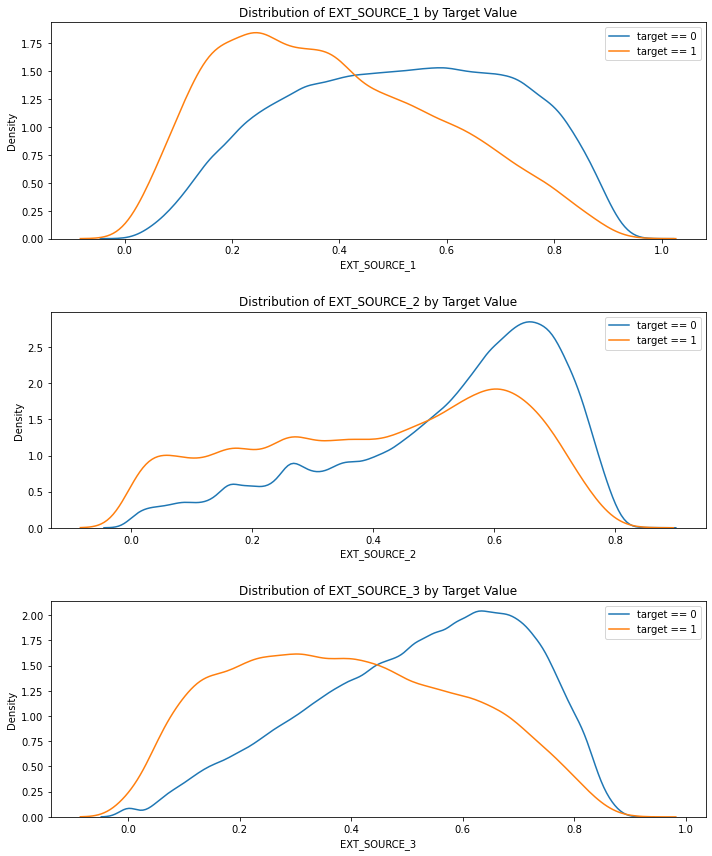

In [175]:
plt.figure(figsize = (10, 12))

# iterate through the sources
for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    
    # create a new subplot for each source
    plt.subplot(3, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(train.loc[train['TARGET'] == 0, source], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(train.loc[train['TARGET'] == 1, source], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density');
    plt.legend()
plt.tight_layout(h_pad = 2.5)

EXT_SOURCE_1,3は、返済の可否との関係が見れそう（特に3）。  
返済可能な0の分布は、スコアが高い方に偏っている。一方、返済困難な1は、スコアが低い方に偏っている。

⑥その他の相関係数が上位の変数は、TARGET（0,1）で違いがありそうか？

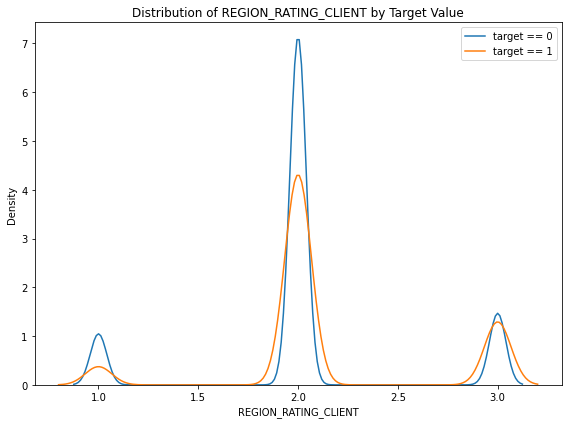

In [176]:
plt.figure(figsize = (8,6))

feature = 'REGION_RATING_CLIENT'
    
sns.kdeplot(train.loc[train['TARGET'] == 0, feature], label = 'target == 0')
sns.kdeplot(train.loc[train['TARGET'] == 1, feature], label = 'target == 1')
    
plt.title('Distribution of %s by Target Value' % feature)
plt.xlabel('%s' % feature); plt.ylabel('Density');
plt.legend()
plt.tight_layout(h_pad = 2.5)

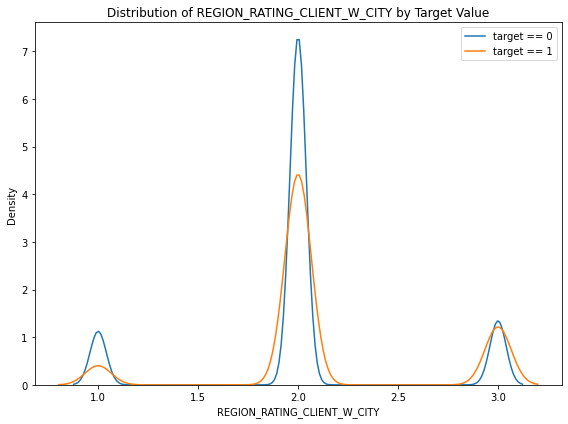

In [177]:
plt.figure(figsize = (8,6))

feature = 'REGION_RATING_CLIENT_W_CITY'
    
sns.kdeplot(train.loc[train['TARGET'] == 0, feature], label = 'target == 0')
sns.kdeplot(train.loc[train['TARGET'] == 1, feature], label = 'target == 1')
    
plt.title('Distribution of %s by Target Value' % feature)
plt.xlabel('%s' % feature); plt.ylabel('Density');
plt.legend()
plt.tight_layout(h_pad = 2.5)

顧客の居住地を（1,2,3）で評価している。
返済困難な顧客は、悪い評価の居住地に多いかと考えたが、違いは見られない

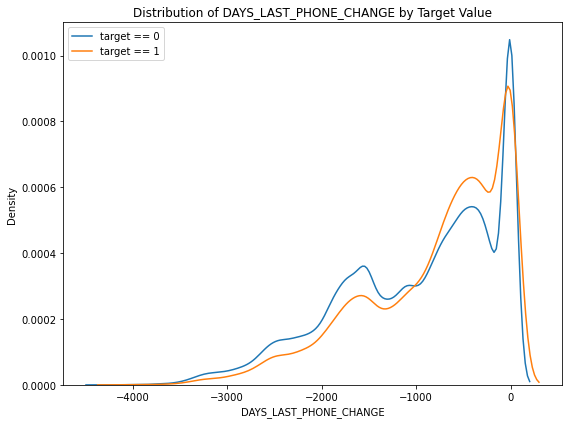

In [178]:
plt.figure(figsize = (8,6))

feature = 'DAYS_LAST_PHONE_CHANGE'
    
sns.kdeplot(train.loc[train['TARGET'] == 0, feature], label = 'target == 0')
sns.kdeplot(train.loc[train['TARGET'] == 1, feature], label = 'target == 1')
    
plt.title('Distribution of %s by Target Value' % feature)
plt.xlabel('%s' % feature); plt.ylabel('Density');
plt.legend()
plt.tight_layout(h_pad = 2.5)

最後に携帯を変えた日  
返済が困難な顧客は、携帯を変える余裕もないのでは？と考えたが、TARGET_1の方が比較的、最近変えている割合が高いようだ。 
目的変数との関係でみると、TARGET_0,1で違いは見られなそう。

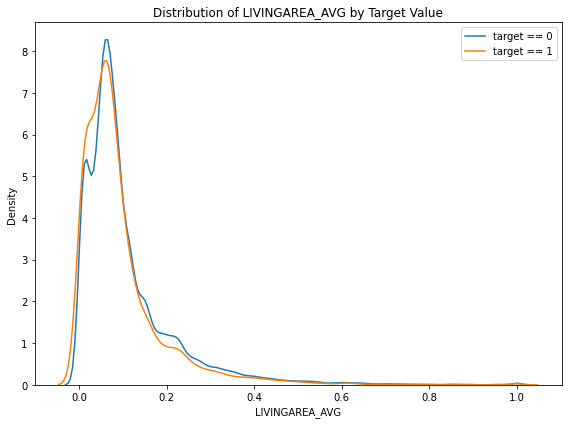

In [179]:
plt.figure(figsize = (8,6))

feature = 'LIVINGAREA_AVG'
    
sns.kdeplot(train.loc[train['TARGET'] == 0, feature], label = 'target == 0')
sns.kdeplot(train.loc[train['TARGET'] == 1, feature], label = 'target == 1')
    
plt.title('Distribution of %s by Target Value' % feature)
plt.xlabel('%s' % feature); plt.ylabel('Density');
plt.legend()
plt.tight_layout(h_pad = 2.5)

TARGET_1の方が値は低くなる傾向があるか確認。  
若干だがTARGET_1の方が、LIVINGAREA_AVGが低い。  
負の相関を示すことから予測に使用できそう。

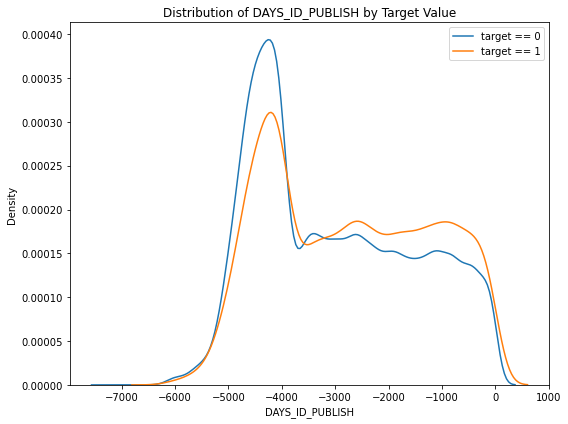

In [180]:
plt.figure(figsize = (8,6))

feature = 'DAYS_ID_PUBLISH'
    
sns.kdeplot(train.loc[train['TARGET'] == 0, feature], label = 'target == 0')
sns.kdeplot(train.loc[train['TARGET'] == 1, feature], label = 'target == 1')
    
plt.title('Distribution of %s by Target Value' % feature)
plt.xlabel('%s' % feature); plt.ylabel('Density');
plt.legend()
plt.tight_layout(h_pad = 2.5)

正の相関があるため、確認。  
融資申込前に本人確認書類を変更した日付は、TARGET_1の方が最近行っている割合が、TARGET_0より高い。  
この変数は、予測に使えそう。

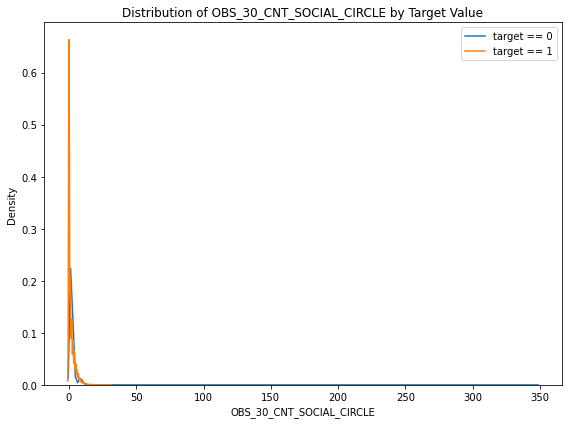

In [181]:
plt.figure(figsize = (8,6))

feature = 'OBS_30_CNT_SOCIAL_CIRCLE'
    
sns.kdeplot(train.loc[train['TARGET'] == 0, feature], label = 'target == 0')
sns.kdeplot(train.loc[train['TARGET'] == 1, feature], label = 'target == 1')
    
plt.title('Distribution of %s by Target Value' % feature)
plt.xlabel('%s' % feature); plt.ylabel('Density');
plt.legend()
plt.tight_layout(h_pad = 2.5)

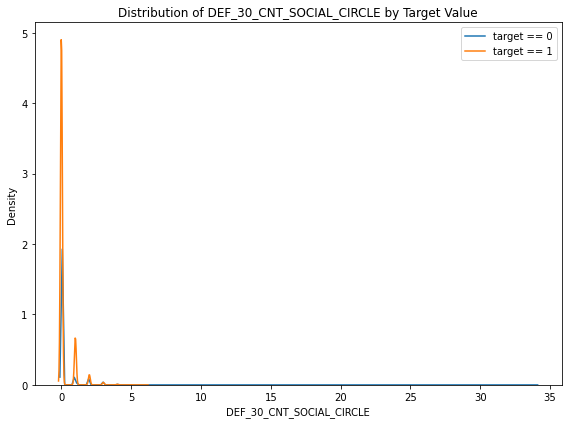

In [182]:
plt.figure(figsize = (8,6))

feature = 'DEF_30_CNT_SOCIAL_CIRCLE'
    
sns.kdeplot(train.loc[train['TARGET'] == 0, feature], label = 'target == 0')
sns.kdeplot(train.loc[train['TARGET'] == 1, feature], label = 'target == 1')
    
plt.title('Distribution of %s by Target Value' % feature)
plt.xlabel('%s' % feature); plt.ylabel('Density');
plt.legend()
plt.tight_layout(h_pad = 2.5)

TARGET_1の方が、返済遅延（30DPD）が多く見られると考える。  
グラフからもTARGET_1の割合が高いようだ。

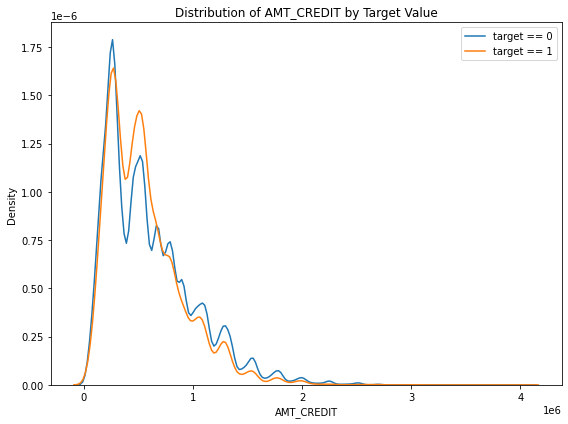

In [183]:
plt.figure(figsize = (8,6))

feature = 'AMT_CREDIT'
    
sns.kdeplot(train.loc[train['TARGET'] == 0, feature], label = 'target == 0')
sns.kdeplot(train.loc[train['TARGET'] == 1, feature], label = 'target == 1')
    
plt.title('Distribution of %s by Target Value' % feature)
plt.xlabel('%s' % feature); plt.ylabel('Density');
plt.legend()
plt.tight_layout(h_pad = 2.5)

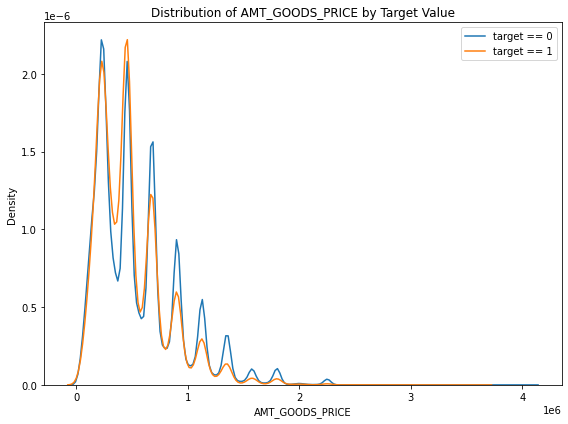

In [184]:
plt.figure(figsize = (8,6))

feature = 'AMT_GOODS_PRICE'
    
sns.kdeplot(train.loc[train['TARGET'] == 0, feature], label = 'target == 0')
sns.kdeplot(train.loc[train['TARGET'] == 1, feature], label = 'target == 1')
    
plt.title('Distribution of %s by Target Value' % feature)
plt.xlabel('%s' % feature); plt.ylabel('Density');
plt.legend()
plt.tight_layout(h_pad = 2.5)

融資の与信額が低い方が、返済困難な人が借りている割合が高そう。  
理由としては、融資を受けられるギリギリを借りているからか？収入面や、家族構成などとの関係を見てみる。

⑦外れ値がないか確認してみる

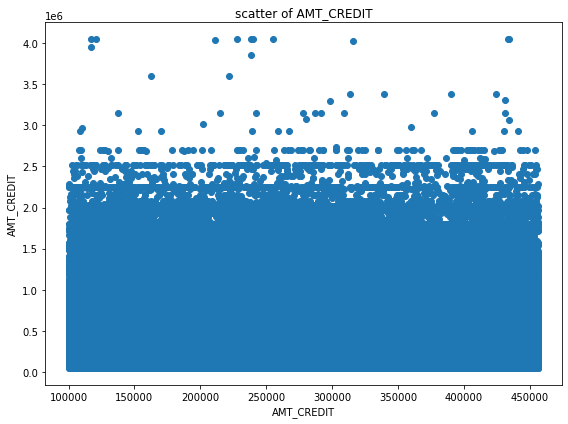

In [187]:
plt.figure(figsize = (8,6))

feature = 'AMT_CREDIT'

plt.scatter(train['SK_ID_CURR'],train[feature])

plt.title('scatter of %s' % feature)
plt.xlabel('%s' % 'AMT_CREDIT'); plt.ylabel(feature);
plt.tight_layout(h_pad = 2.5)

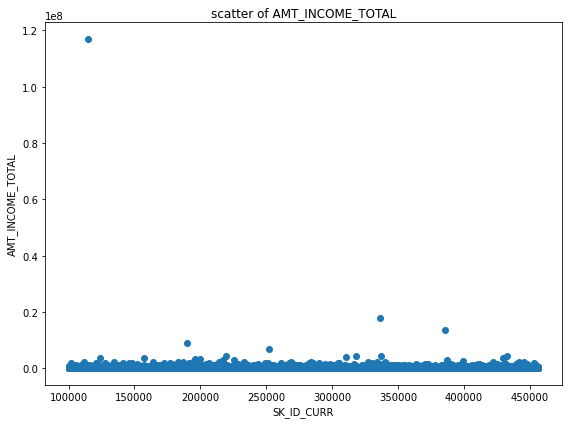

In [188]:
plt.figure(figsize = (8,6))

feature = 'AMT_INCOME_TOTAL'

plt.scatter(train['SK_ID_CURR'],train[feature])

plt.title('scatter of %s' % feature)
plt.xlabel('%s' % 'SK_ID_CURR'); plt.ylabel(feature);
plt.tight_layout(h_pad = 2.5)

一人、飛び抜けた値がある。総収入を扱う際は、注意したい。